# Supplemental Figure S20: Correlation plots of the top 10 atomic pair correlations for C-C pairs

# Setup

## imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dms_3d_features.plotting import *

## extra functions

## load data

In [3]:
DATA_PATH = "../../data"
REVISION_PATH = "../../data/revisions"

In [4]:
df_dist = pd.read_csv(f"{DATA_PATH}/pdb-features/non_canonical_atom_distances.csv")

# Plotting

/Users/jyesselman2/Library/CloudStorage/Dropbox/4_papers/2024_dms_quant_framework/dms_3d_features/plotting.py:787: UserWarning: Subplots won't fit vertically! Required height: 5.40", Figure height: 4.00". Consider increasing figure height or reducing subplot height/spacing.
  warnings.warn(


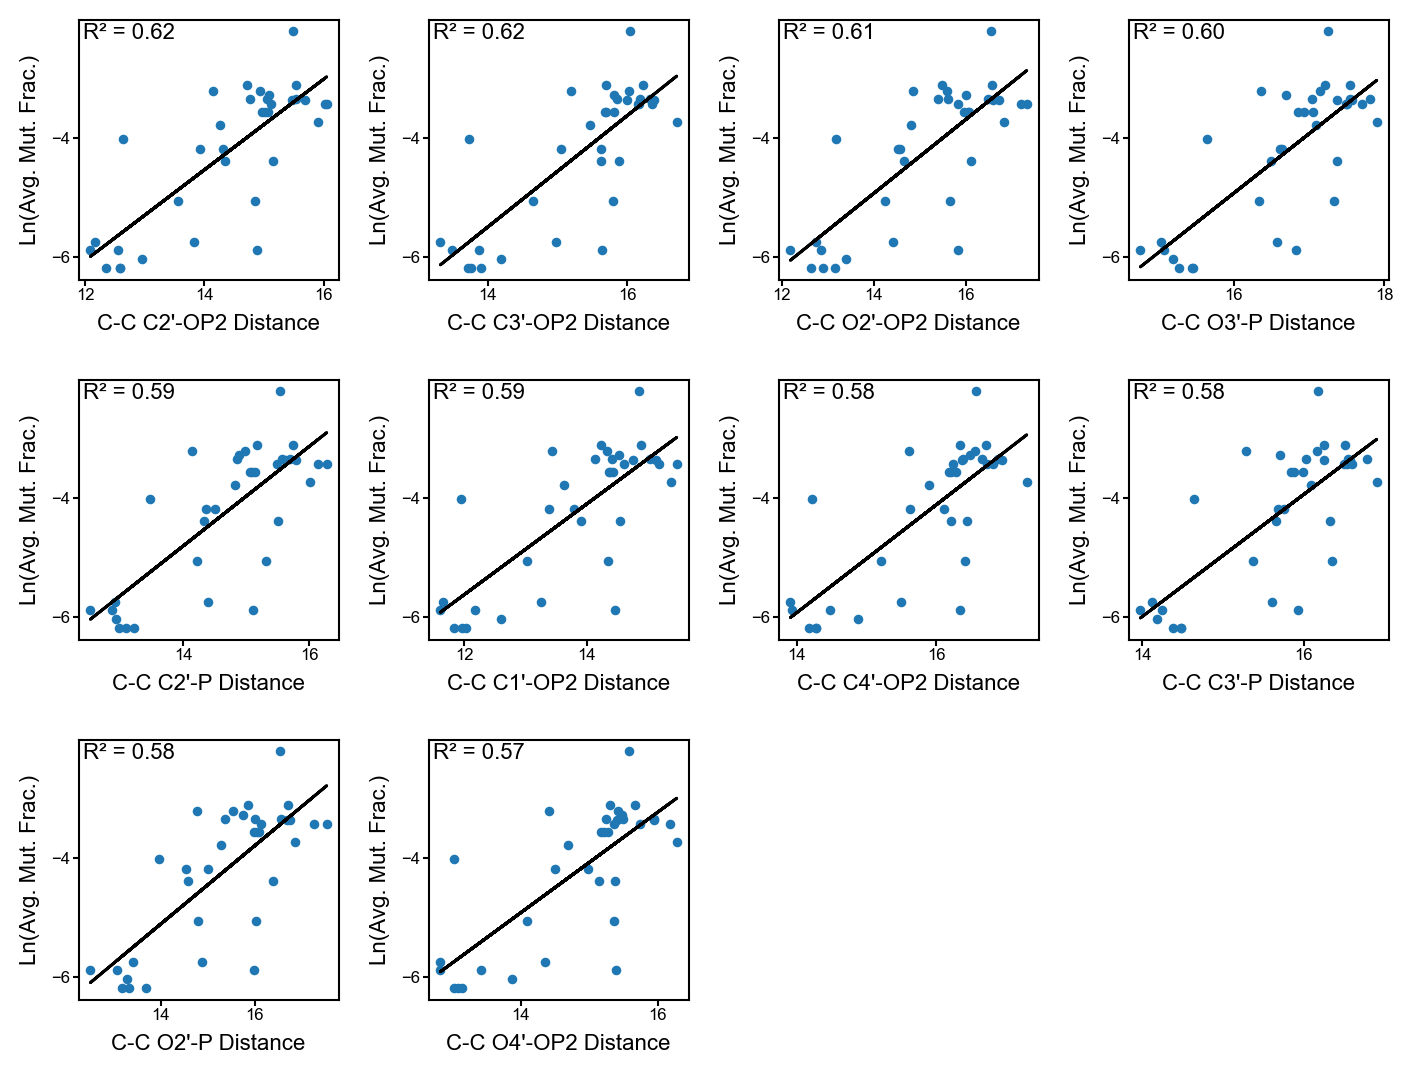

In [5]:
df_dist_cc = df_dist.query('pair == "C-C" and ln_r_data_mean != ""').copy()
df_unique = df_dist_cc.drop_duplicates(subset=["pair", "atom1", "atom2", "r2"]).copy()
df_unique.sort_values(by="r2", ascending=False, inplace=True)
df_top_11 = df_unique.head(11).reset_index(drop=True)
df_top_10 = df_top_11.drop(0)

fig_size = (7, 4)
layout = (3, 4)
subplot_size = (1.3, 1.3)  # Each subplot is 4" x 3"
spacing = {
    "hspace": 0.45,  # horizontal spacing in inches
    "wspace": 0.50,  # vertical spacing in inches
    "margins": {"left": 0.40, "right": 0.0, "top": 0.0, "bottom": 0.50},
}

coords_list = calculate_subplot_coordinates(fig_size, layout, subplot_size, spacing)
fig = plt.figure(figsize=fig_size, dpi=200)
pos = 0
for i, row in df_top_10.iterrows():
    df_plot = df_dist.query(
        f'pair == "{row["pair"]}" and atom1 == "{row["atom1"]}" and atom2 == "{row["atom2"]}"'
    ).copy()
    ax = fig.add_axes(coords_list[pos])
    scatter_plot_w_regression(
        df_plot, ax, "distance", "ln_r_data_mean", r2_position=(0.37, 0.99)
    )
    ax.set_xlabel(f'C-C {row["atom1"]}-{row["atom2"]} Distance')
    ax.set_ylabel("Ln(Avg. Mut. Frac.)")
    publication_style_ax(ax)
    pos += 1
fig.savefig(
    "../../figures/supplemental_figures/supplemental_figure_s20.png",
    dpi=600,
    bbox_inches="tight",
)